# Centralidade de Intermediação com Aeroportos

Nesta parte da atividade vamos explorar o uso da centralidade de intermediação em um grafo de aeroportos e
rotas. Primeiramente vamos construir o grafo, baseado em dados disponíveis na internet, e em seguida faremos
as análises.

Os dados e a documentação associada estão originalmente disponíveis em [openflights](https://openflights.org/data.html),
especificamente os arquivos de dados de aeroportos (`airports.dat`) e rotas (`routes.dat`). Apesar da extensão dos
arquivos ser `.dat`, os arquivos estão no formato CSV (*comma-separated values*).

## 1. Carregando os dados de aeroportos

Use a função `read_csv` da biblioteca Pandas para carregar o arquivo de dados de aeroportos. O arquivo não inclui
os nomes das colunas, então é preciso especificar esses nomes usando o parâmetro `name` da função `read_csv`.
A descrição de cada coluna dos dados pode ser vista na documentação dos dados, no site openflights.
Também é recomendado especificar apenas as colunas de interesse, usando o parâmetro `usecols`, e os tipos das
colunas usando `dtype`. A maioria das colunas pode ser usada como tipo *string*. Imprima as informações do
DataFrame `aeroportos` usando o método `info()`.

In [1]:
import pandas as pd

# TODO: carrega o arquivo airports.dat em um DataFrame da biblioteca Pandas
airports = pd.read_csv('airports.dat', names=['Aeroportos ID','Nome','Cidade','País','IATA','ICAO','Latitude','Longitude','Altitude',
                                             'Fuso horário','DST','Fuso Horário em','Tipo','Fonte'])
airports.head()

,Aeroportos ID,Nome,Cidade,País,IATA,ICAO,Latitude,Longitude,Altitude,Fuso horário,DST,Fuso Horário em,Tipo,Fonte
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [2]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7698 entries, 0 to 7697
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Aeroportos ID    7698 non-null   int64  
 1   Nome             7698 non-null   object 
 2   Cidade           7649 non-null   object 
 3   País             7698 non-null   object 
 4   IATA             7698 non-null   object 
 5   ICAO             7698 non-null   object 
 6   Latitude         7698 non-null   float64
 7   Longitude        7698 non-null   float64
 8   Altitude         7698 non-null   int64  
 9   Fuso horário     7698 non-null   object 
 10  DST              7698 non-null   object 
 11  Fuso Horário em  7698 non-null   object 
 12  Tipo             7698 non-null   object 
 13  Fonte            7698 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 842.1+ KB


## 2. Carregando os dados de vôos

Use novamente a função `read_csv` para carregar o arquivo de dados de vôos. Especifique os nomes das colunas
com `name`, as colunas de interesse com `usecols` e os tipos das colunas com `dtype`. Entre as colunas carregadas,
inclua a coluna *stops* que especifica se o vôo é direto ou não. Imprima as informações do
DataFrame `aeroportos` usando o método `info()`.

In [3]:
# TODO: carrega o arquivo routes.dat em um DataFrame Pandas
routes = pd.read_csv('routes.dat', names=['Airline','Airline ID','Source airport','Source airport ID','Destination airport'
                                         ,'Destination airport ID','Codeshare','Stops','Equipment'])
routes.head()

,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Codeshare,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [4]:
routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67663 entries, 0 to 67662
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Airline                 67663 non-null  object
 1   Airline ID              67663 non-null  object
 2   Source airport          67663 non-null  object
 3   Source airport ID       67663 non-null  object
 4   Destination airport     67663 non-null  object
 5   Destination airport ID  67663 non-null  object
 6   Codeshare               14597 non-null  object
 7   Stops                   67663 non-null  int64 
 8   Equipment               67645 non-null  object
dtypes: int64(1), object(8)
memory usage: 4.6+ MB


## 3. Eliminando vôos

Elimine do dataframe `rotas` os vôos que tem valor diferente de 0 para a coluna *stops*. Esses vôos não são
diretos, e não nos interessam para a construção do grafo.

Também existem vôos em que o *Source Airport ID* ou o *Destination Airport ID* estão faltando (representados no
arquivo de dados por `\N`. Elimine vôos cujo ID do aeroporto de partida ou de destino estão faltando. Imprima as
informações do dataframe `rotas` após a eliminação.

In [5]:
# TODO: elimina vôos que não são diretos
indices_remove = routes[routes['Stops'] != 0].index
new_routes = routes.drop(indices_remove)

In [6]:
# TODO: elimina vôos que não tem o ID do aeroporto de origem ou destino
new_routes = new_routes.reset_index().drop(columns=['index'])
indices_ID = new_routes[new_routes['Source airport ID'] == '\\N'].index
new_routes = new_routes.drop(indices_ID)

In [7]:
new_routes = new_routes.reset_index().drop(columns=['index'])
indices_ID_ = new_routes[new_routes['Destination airport ID'] == '\\N'].index
new_routes = new_routes.drop(indices_ID_)

In [8]:
# TODO: imprime informações do DataFrame após redução dos dados
new_routes.reset_index().drop(columns=['index']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67229 entries, 0 to 67228
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Airline                 67229 non-null  object
 1   Airline ID              67229 non-null  object
 2   Source airport          67229 non-null  object
 3   Source airport ID       67229 non-null  object
 4   Destination airport     67229 non-null  object
 5   Destination airport ID  67229 non-null  object
 6   Codeshare               14565 non-null  object
 7   Stops                   67229 non-null  int64 
 8   Equipment               67211 non-null  object
dtypes: int64(1), object(8)
memory usage: 4.6+ MB


In [9]:
new_routes.head()

,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Codeshare,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


## 4. Eliminação de aeroportos

Os dados sobre os aeroportos no openflights são mais completos que os dados de vôos. Por isso, existem muitos
aeroportos na tabela de aeroportos que não estão incluídos em nenhum vôo da tabela de vôos. Quando construirmos o
grafo dos aeroportos, estes que não aparecem em nenhum vôo ficarão como nós isolados no grafo, o que não nos
interessa muito. Elimine todos os aeroportos no DataFrame `aeroportos` que não aparecem como aeroporto de origem
ou destino em algum vôo no DataFrame `rotas`. Imprima as informações do DataFrame `aeroportos` após as
eliminações.

In [10]:
airports.head()

,Aeroportos ID,Nome,Cidade,País,IATA,ICAO,Latitude,Longitude,Altitude,Fuso horário,DST,Fuso Horário em,Tipo,Fonte
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
new_routes['Source airport ID'] = new_routes['Source airport ID'].astype(np.int64)
new_routes['Destination airport ID'] = new_routes['Destination airport ID'].astype(np.int64)

In [13]:
indices = []

for i in airports['Aeroportos ID']:
    if i not in new_routes['Source airport ID'].to_numpy() or i not in new_routes['Destination airport ID'].to_numpy():
        indices.append(i)
            

In [14]:
indices

[13,
 14,
 17,
 19,
 20,
 22,
 23,
 25,
 26,
 35,
 38,
 39,
 42,
 43,
 44,
 46,
 47,
 51,
 52,
 53,
 57,
 59,
 64,
 66,
 74,
 76,
 81,
 82,
 83,
 84,
 86,
 88,
 89,
 92,
 93,
 95,
 96,
 97,
 98,
 101,
 102,
 103,
 104,
 107,
 110,
 114,
 123,
 124,
 129,
 130,
 131,
 134,
 137,
 138,
 142,
 150,
 151,
 157,
 158,
 159,
 163,
 165,
 171,
 185,
 186,
 191,
 194,
 195,
 197,
 201,
 203,
 204,
 205,
 207,
 208,
 212,
 213,
 214,
 215,
 217,
 218,
 219,
 226,
 227,
 228,
 229,
 232,
 241,
 242,
 250,
 254,
 255,
 256,
 257,
 258,
 259,
 261,
 265,
 271,
 272,
 274,
 278,
 279,
 281,
 282,
 283,
 284,
 285,
 288,
 289,
 292,
 294,
 297,
 300,
 301,
 303,
 305,
 306,
 307,
 308,
 311,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 333,
 334,
 335,
 336,
 343,
 354,
 357,
 358,
 359,
 360,
 361,
 363,
 365,
 366,
 367,
 368,
 369,
 370,
 372,
 375,
 376,
 377,
 378,
 379,
 380,
 381,
 383,
 384,
 385,
 386,
 387,
 388,
 

In [15]:
# TODO: elimina aeroportos que não aparecem em nenhuma rota

for ind in indices:
    indice = airports[airports['Aeroportos ID'] == ind].index 
    airports = airports.drop(indice)
    

In [16]:
airports = airports.reset_index().drop(columns=['index'])

In [17]:
# TODO: imprime informações de aeroportos após as eliminações

airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3199 entries, 0 to 3198
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Aeroportos ID    3199 non-null   int64  
 1   Nome             3199 non-null   object 
 2   Cidade           3199 non-null   object 
 3   País             3199 non-null   object 
 4   IATA             3199 non-null   object 
 5   ICAO             3199 non-null   object 
 6   Latitude         3199 non-null   float64
 7   Longitude        3199 non-null   float64
 8   Altitude         3199 non-null   int64  
 9   Fuso horário     3199 non-null   object 
 10  DST              3199 non-null   object 
 11  Fuso Horário em  3199 non-null   object 
 12  Tipo             3199 non-null   object 
 13  Fonte            3199 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 350.0+ KB


## 5. Criação do grafo

Agora, com os dados de interesse selecionados, podemos criar o grafo de aeroportos, em que os nós são os
aeroportos, e dois nós são ligados por uma aresta se houver algum vôo direto entre eles. Crie um grafo
não-direcionado e inclua os nós dos aeroportos. Use como identificador do nó o identificador do aeroporto
(*Airport ID*), presente no DataFrame. Inclua como atributos dos nós o nome do aeroporto, a cidade e o
país.

In [18]:
import networkx as nx

# TODO: cria grafo não-direcionado
G_aeroportos = nx.Graph()

# TODO: inclui um nó para cada aeroporto no DataFrame aeroportos

for i in range(len(airports)):
    G_aeroportos.add_node(airports['Aeroportos ID'][i], nome=airports['Nome'][i], cidade=airports['Cidade'][i], pais=airports['País'][i])

In [19]:
G_aeroportos.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 16, 18, 21, 24, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 40, 41, 45, 48, 49, 50, 54, 55, 56, 58, 60, 61, 62, 63, 65, 67, 68, 69, 70, 71, 72, 73, 75, 77, 78, 79, 80, 85, 87, 90, 91, 94, 99, 100, 105, 106, 108, 109, 111, 112, 113, 115, 116, 117, 119, 120, 121, 122, 125, 126, 127, 128, 132, 133, 135, 136, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 152, 153, 154, 155, 156, 160, 161, 162, 164, 166, 167, 168, 169, 170, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 187, 188, 189, 190, 192, 193, 196, 198, 199, 200, 202, 206, 209, 210, 211, 216, 220, 221, 222, 224, 225, 230, 231, 233, 234, 235, 236, 237, 238, 239, 240, 243, 244, 245, 246, 247, 248, 249, 251, 252, 253, 260, 262, 263, 264, 266, 267, 268, 269, 270, 273, 275, 276, 277, 280, 286, 287, 290, 291, 293, 295, 296, 298, 299, 302, 304, 309, 310, 337, 338, 339, 340, 341, 342, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 355, 356, 362, 364, 371, 373, 374, 382,

## 6. Inclusão das arestas

Crie, no grafo `G_aeroportos`, uma aresta para cada vôo no DataFrame `rotas`; como os grafos usam como identificador
o *Airport ID*, pode-se usar diretamente os IDs de origem e destino nas rotas para criar as arestas.

In [20]:
# TODO: crie uma aresta para cada vôo no DataFrame rotas
for i in range(len(new_routes)):
    G_aeroportos.add_edge(new_routes['Source airport ID'].to_numpy()[i], new_routes['Destination airport ID'].to_numpy()[i])

## 7. Visualização do grafo de aeroportos

Mostre uma visualização do grafo de aeroportos usando `nx.draw()`. Especifique as opções que achar melhor para
visualizar a estrutura do grafo.

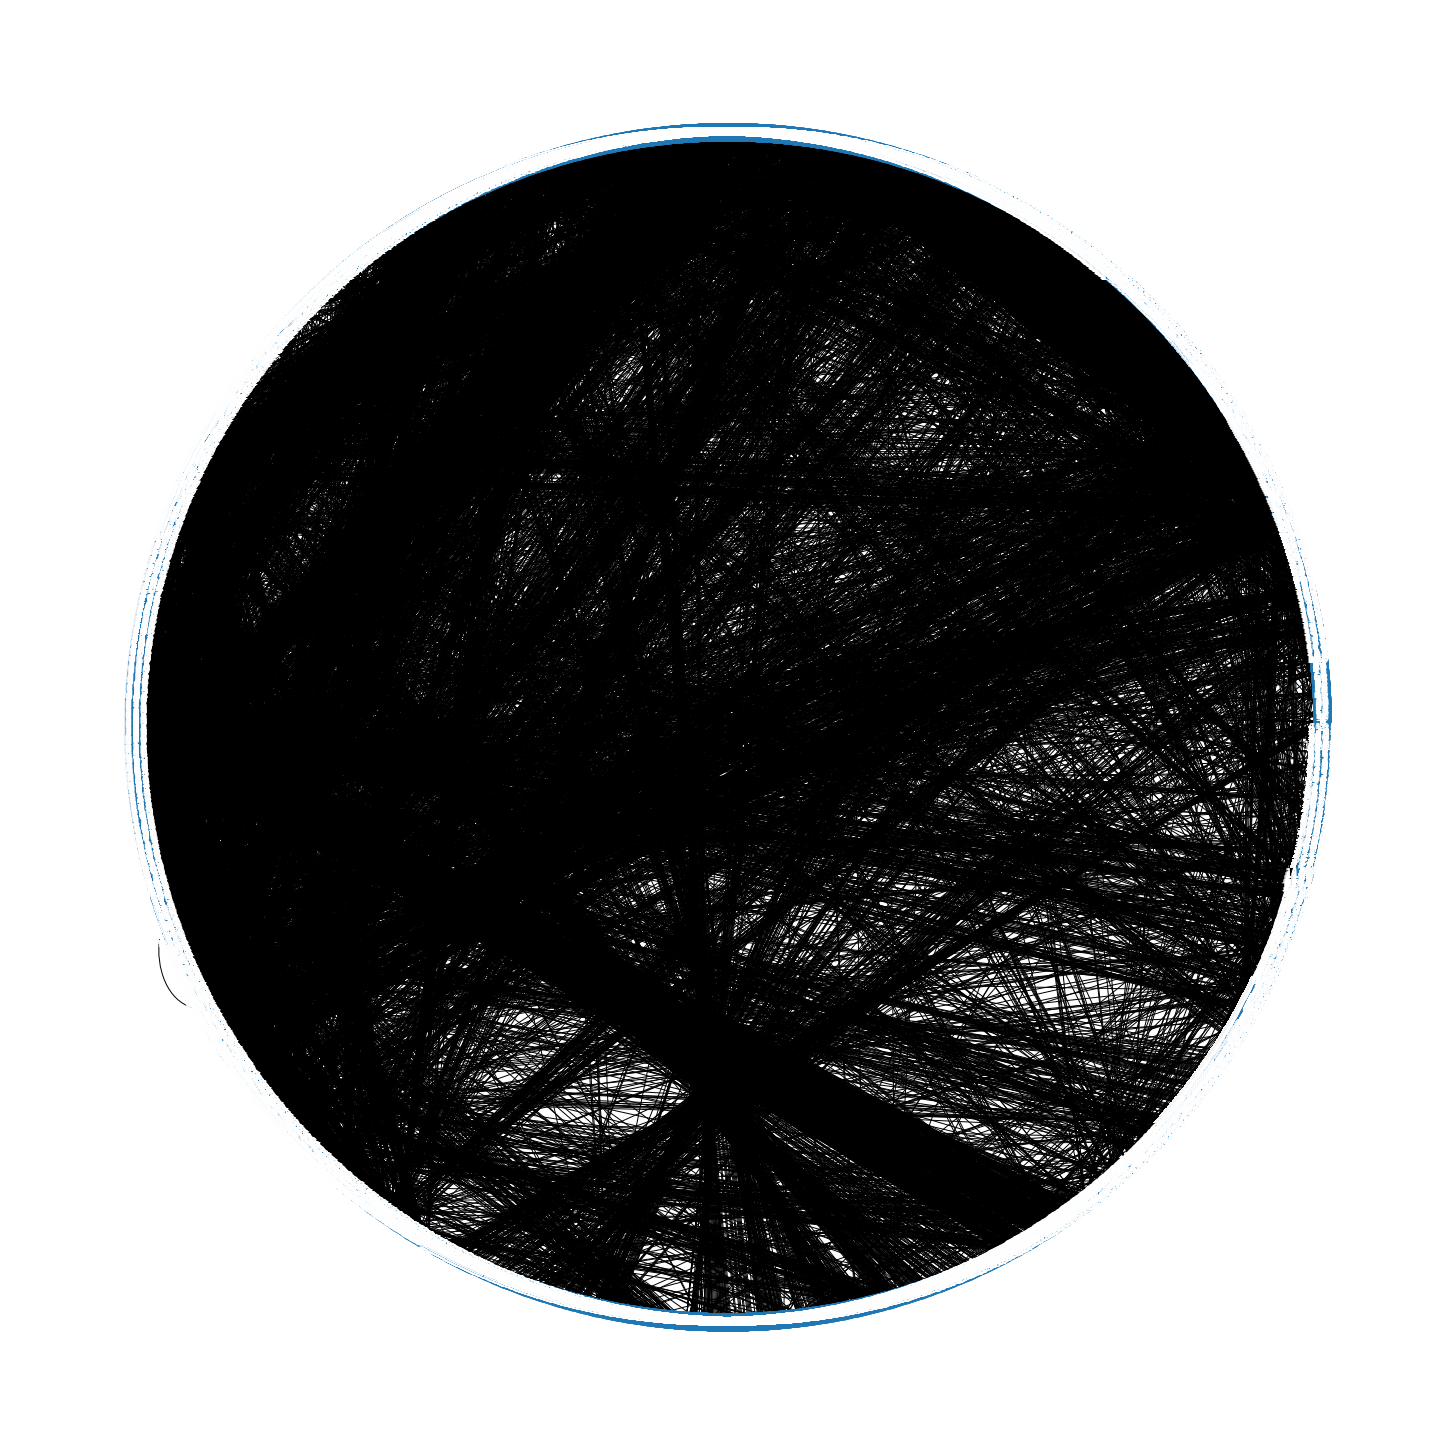

In [21]:
# TODO: cria e mostra uma visualização do grafo de aeroportos
plt.figure(figsize=(20,20))
nx.draw(G_aeroportos, pos=nx.circular_layout(G_aeroportos), with_labels=True, font_color='white')
plt.show()

## 8. Cálculo e análise da centralidade de intermediação

Calcule a centralidade de intermediação para os nós do grafo de aeroportos usando a função `nx.betweenness_centrality`.
Quais são os 5 maiores valores de centralidade obtidos e quais aeroportos possuem esses valores? Faça uma análise dos
aeroportos observados. O que significa um nó com centralidade de intermediação alto em um grafo de rotas?

In [22]:
# TODO: calcula centralidade de intermediação
def between():
    
    centrality_ = nx.betweenness_centrality(G_aeroportos)
    between = [centrality_[no] for no in centrality_]
    bet = np.argsort(between)[::-1]
    maiores = [between[ind] for ind in bet[:5]]
    
    aeroportos = []

    for no in centrality_:
        for number in maiores:
            if centrality_[no] == number:
                aeroportos.append(no)
                
    return aeroportos, maiores

def print_aeroportos(aeroportos):
    for aeroporto in aeroportos:
        print(f'{G_aeroportos.nodes()[aeroporto]}\n')
        
def print_numeros(maiores):
    for numb in maiores:
        print(f'{numb}\n')

In [23]:
aeroportos_, cinco = between()

In [24]:
print_aeroportos(aeroportos_)

{'nome': 'Frankfurt am Main Airport', 'cidade': 'Frankfurt', 'pais': 'Germany'}

{'nome': 'Charles de Gaulle International Airport', 'cidade': 'Paris', 'pais': 'France'}

{'nome': 'Dubai International Airport', 'cidade': 'Dubai', 'pais': 'United Arab Emirates'}

{'nome': 'Los Angeles International Airport', 'cidade': 'Los Angeles', 'pais': 'United States'}

{'nome': 'Ted Stevens Anchorage International Airport', 'cidade': 'Anchorage', 'pais': 'United States'}



In [25]:
print_numeros(cinco)

0.07394416844980117

0.06516904583743942

0.06250529820404553

0.055774662343800796

0.05191619606084131



Quer dizer que esse nó serve como um intermediador para dois os mais grupos de rotas.

## 9. Centralidade de intermediação e de grau

Calcule a centralidade de grau para os nós do grafo de aeroportos usando a função `nx.degree_centrality`. Obtenha os
5 maiores valores de centralidade de grau, e quais aeroportos possuem esses valores. Essa lista coincide com
a lista dos aeroportos com maiores valores de centralidade de intermediação? Se houver diferenças, tente
explicar essas diferenças.

In [26]:
# TODO: calcula centralidade de grau
def between():
    
    centrality_ = nx.degree_centrality(G_aeroportos)
    between = [centrality_[no] for no in centrality_]
    bet = np.argsort(between)[::-1]
    maiores = [between[ind] for ind in bet[:5]]
    
    aeroportos = []

    for no in centrality_:
        for number in maiores:
            if centrality_[no] == number:
                aeroportos.append(no)
                
    return aeroportos, maiores

In [27]:
aeroportos_, cinco = between()

In [28]:
print_aeroportos(aeroportos_)

{'nome': 'Frankfurt am Main Airport', 'cidade': 'Frankfurt', 'pais': 'Germany'}

{'nome': 'Amsterdam Airport Schiphol', 'cidade': 'Amsterdam', 'pais': 'Netherlands'}

{'nome': 'Charles de Gaulle International Airport', 'cidade': 'Paris', 'pais': 'France'}

{'nome': 'Atatürk International Airport', 'cidade': 'Istanbul', 'pais': 'Turkey'}

{'nome': 'Hartsfield Jackson Atlanta International Airport', 'cidade': 'Atlanta', 'pais': 'United States'}



In [29]:
print_numeros(cinco)

0.07449684589966957

0.07329528386902974

0.07209372183838991

0.07029137879243016

0.06518474016221087



Vão existir algumas diferenças pois nem sempre o aeroporto que tem a maior quantidade de rotas ligadas nele tem a maior centralidade de intermediação.

Uma alta centralidade de intermediação não significa um alto valor da centralidade do grau.